In [1]:
import sys
sys.path.append("../")

import numpy as np

In [2]:
from soda.util.config import Config

In [17]:
config_game = "../configs/game/all_pay/all_pay.yaml"
config_learner = "../configs/learner/sofw.yaml"

config = Config(config_game, config_learner)
game, learner = config.create_setting()
game.get_utility()

In [18]:
print(game.mechanism)

Mechanism(all_pay)
- bidder: ['1', '1'] 
- observation space:
   - 1: [0.0, 1.0]
- action space:
   - 1: [0.0, 0.7]
- prior
   - distribution: uniform
- utility
   - tie_breaking: lose
   - payment_rule: first_price
   - type: value
   - utility_type: RN



In [19]:
print(learner)

{'method': 'standard', 'steprule_bool': False}
Learner(frank_wolfe)
- max_iter: 1000
- stop_criterion: util_loss < 0.0001
- parameter:
   - method: standard
   - steprule_bool: False



In [20]:
strategies = config.create_strategies(game)
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

  0%|                    | 0.00/1.00k [00:00<?, ?it/s]

100%|████████████████████| 1.00k/1.00k [00:00<00:00, 2.69kit/s]

No convergence with stopping criterion
Current value of (util_loss): 0.00035
Best value of (util_loss)   : 0.00035)


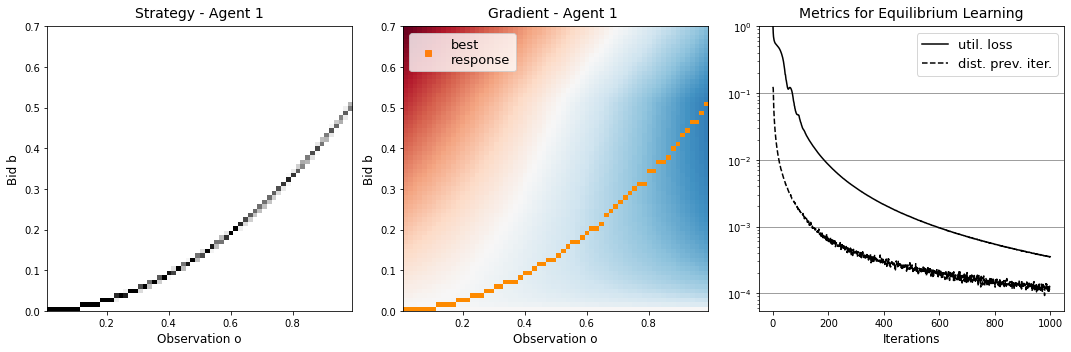

In [21]:
strategies['1'].plot(grad=True, metrics=True)